In [2]:
import numpy as np
import pandas as pd
#from io import StringIO
import os
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
h = 8
w = h*1.61803398875
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

#from matplotlib import rc
plt.rc('font',**{'family':'serif','serif':['Times New Roman']})
plt.rc('text', usetex=True)

h = 8
w = 8*1.61803398875

In [3]:
# Data the KB Curve is Based Upon
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/ppd_all.csv"
filePath = os.path.join(working_dir, data_path)
shot_data = pd.read_csv(filePath)
shot_data.head()

,scaled_distance,positive_phase_duration,reference
0,2.036952,0.755295,"(Reisler et al., 1976, 1977)"
1,2.277968,0.965587,"(Reisler et al., 1976, 1977)"
2,2.509929,0.938515,"(Reisler et al., 1976, 1977)"
3,3.047117,0.886626,"(Reisler et al., 1976, 1977)"
4,3.522769,0.926388,"(Reisler et al., 1976, 1977)"


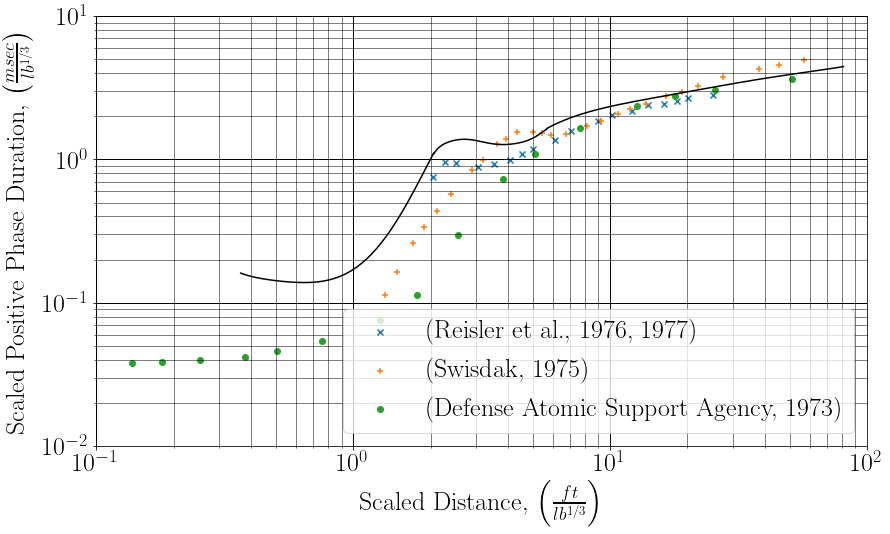

In [4]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.450,2.54,0.001)
    TL1 = np.log10(T1)
    U1 = (-0.1790217052 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.72867177600500*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(2.54,7.00,0.001)
    TL2 = np.log10(T2)
    U2 = (-5.85909812338 + 9.2996288611*TL2)   
    Y2 = 10**(0.20096507334000*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(7.00,100.00,0.001)
    TL3 = np.log10(T3)
    U3 = (-4.92699491141 + 3.46349745571*TL3)   
    Y3 = 10**(0.572462469964*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

mkr_dict = {'(Reisler et al., 1976, 1977)': 'x', '(Swisdak, 1975)': '+', '(Defense Atomic Support Agency, 1973)': 'o'}
for kind in mkr_dict:
    d = shot_data[shot_data.reference==kind]
    ax.scatter(d.scaled_distance, d.positive_phase_duration,  
                marker = mkr_dict[kind], label=kind)
ax.legend()
f = 0.81
plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
plt.ylim(0.01,10)
plt.xlim(0.10,100)
plt.loglog(T1*f,Y1*f,color='black');
plt.loglog(T2*f,Y2*f,color='black');
plt.loglog(T3*f,Y3*f,color='black');
plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{lb^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{ft}{lb^{1/3}}\right)$')
plt.tight_layout()
#ax.annotate('local max', xy=(3.2, 1.7), xytext=(4.1, 4.1),
#            arrowprops=dict(facecolor='black', shrink=0.05),
#            )

data_path = "5_reports/figures"
file_name = "fig_ppd_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()

In [5]:
# 5 tn Data
working_dir = os.path.join(os.path.expanduser("~"), "Documents/github/comprehensive/")
data_path = "2_data/positive_phase_duration/raw/data_5tn_ppd.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_5tn = pd.read_csv(filePath)
# 20 tn Data
data_path = "2_data/positive_phase_duration/raw/data_20tn_ppd.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_20tn = pd.read_csv(filePath)
# 100 tn Data
data_path = "2_data/positive_phase_duration/raw/data_100tn_ppd.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_100tn = pd.read_csv(filePath)
# 500 tn Data
data_path = "2_data/positive_phase_duration/raw/data_500tn_ppd.csv"
filePath = os.path.join(working_dir, data_path)
shot_data_500tn = pd.read_csv(filePath)

In [6]:
x_5tn = shot_data_5tn['scaled-distance_metric']
y_5tn = shot_data_5tn['scaled_ppd_metric']

x_20tn = shot_data_20tn['scaled-distance_metric']
y_20tn = shot_data_20tn['scaled_ppd_metric']

x_100tn = shot_data_100tn['scaled-distance_metric']
y_100tn = shot_data_100tn['scaled_ppd_metric']

x_500tn = shot_data_500tn['scaled-distance_metric']
y_500tn = shot_data_500tn['scaled_ppd_metric']

In [7]:
Blast = 'surface'

if Blast == 'freeair':
    T = np.arange(0.134,100.0,0.001)
    TL = np.log10(T)
    U = (-0.80501734056 + 1.37407043777*TL)   
    Y = 10**(- 0.0423733936826 + 1.36456871214000*U
        - 0.0570035692784*U**2 - 0.18283222479600*U**3
        + 0.0118851436014*U**4 + 0.04326486876270*U**5  
        - 0.0007997367834*U**6 - 0.00436073555033*U**7)

else: #surface
    T1 = np.arange(0.178,1.011,0.001)
    TL1 = np.log10(T1)
    U1 = (1.92946154068 + 5.25099193925*TL1)   
    Y1 = 10**(- 0.61422760355900*U1**0 + 0.13014371767500*U1**1
              + 0.13487251195400*U1**2 + 0.03915742769060*U1**3
              - 0.00475933664702*U1**4 - 0.00428144598008*U1**5)
    
    T2 = np.arange(1.01,2.781,0.001)
    TL2 = np.log10(T2)
    U2 = (-2.12492525216 + 9.2996288611*TL2)   
    Y2 = 10**(0.31540924578400*U2**0 - 0.02979442689760*U2**1
            + 0.03063295428800*U2**2 + 0.01834055740860*U2**3
            - 0.01739646662110*U2**4 - 0.00106321963633*U2**5
            + 0.00562060030977*U2**6 + 0.00016182174990*U2**7
            - 0.00068601889440*U2**8)

    T3 = np.arange(2.78,40.001,0.001)
    TL3 = np.log10(T3)
    U3 = (-3.53626218091 + 3.46349745571*TL3)   
    Y3 = 10**(0.686906642409*U3**0 + 0.09330353040090*U3**1
         - 0.000584942088300*U3**2 - 0.00226884995010*U3**3
         - 0.002959085915050*U3**4 + 0.00148029868929*U3**5)

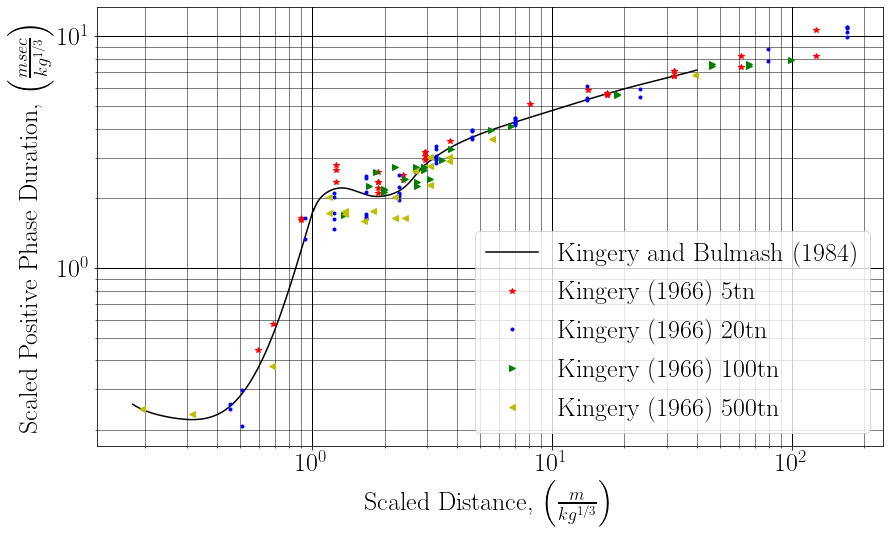

In [8]:

pltfont = {'fontname':'serif', 'fontsize':'16'}
fig, ax = plt.subplots(figsize=(w, h))

plt.grid(b=True, which='major', color='black', linestyle='-', linewidth=1)
plt.grid(b=True, which='minor', color='black', linestyle='-', linewidth=.5)
#plt.ylim(0.01,10)
#plt.xlim(0.10,100)
plt.loglog(T1,Y1,color='black', label='Kingery and Bulmash (1984)');
plt.loglog(T2,Y2,color='black');
plt.loglog(T3,Y3,color='black');
# 5 ton
plt.loglog(x_5tn,y_5tn,'r*',label='Kingery (1966) 5tn')
# 20 ton
plt.loglog(x_20tn,y_20tn,'b.',label='Kingery (1966) 20tn')
# 100 ton
plt.loglog(x_100tn,y_100tn,'g>',label='Kingery (1966) 100tn')
# 500 ton
plt.loglog(x_500tn,y_500tn,'y<',label='Kingery (1966) 500tn')

plt.ylabel(r'Scaled Positive Phase Duration, $\left(\frac{msec}{kg^{1/3}}\right)$')
plt.xlabel(r'Scaled Distance, $\left(\frac{m}{kg^{1/3}}\right)$')
ax.legend()
plt.tight_layout()


data_path = "5_reports/figures"
file_name = "fig_ppd_tn_data.png"
filePath = os.path.join(working_dir, data_path, file_name)
plt.savefig(filePath)

plt.show()